In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [25]:
# loading the dataset

data = pd.read_csv("insurance.csv")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
data.sample(n=10)

There are 1338 rows and 7 columns.


,age,sex,bmi,children,smoker,region,charges
559,19,male,35.530,0,no,northwest,1646.42970
1087,57,male,31.540,0,no,northwest,11353.22760
1020,51,male,37.000,0,no,southwest,8798.59300
460,49,female,36.630,3,no,southeast,10381.47870
802,21,male,22.300,1,no,southwest,2103.08000
298,31,male,34.390,3,yes,northwest,38746.35510
481,49,male,37.510,2,no,southeast,9304.70190
616,56,female,28.595,0,no,northeast,11658.11505
763,27,male,26.030,0,no,northeast,3070.80870
750,37,female,26.400,0,yes,southeast,19539.24300


<IPython.core.display.Javascript object>

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [4]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

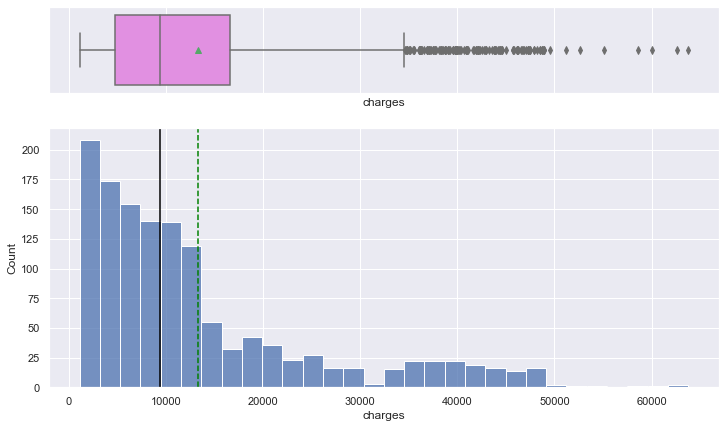

<IPython.core.display.Javascript object>

In [5]:
histogram_boxplot(data, "charges")

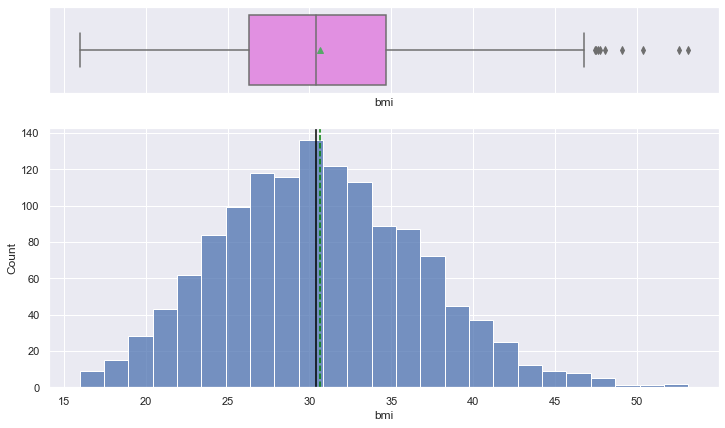

<IPython.core.display.Javascript object>

In [6]:
histogram_boxplot(data, "bmi")

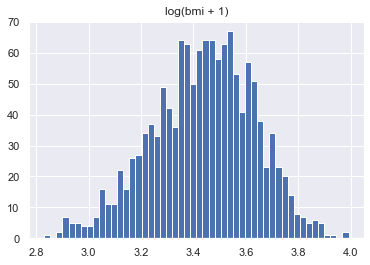

<IPython.core.display.Javascript object>

In [10]:
plt.hist(np.log(data["bmi"] + 1), 50)
plt.title("log(bmi + 1)")
plt.show()

In [29]:
data.groupby("region")["charges"].median().round(1)

region
northeast    10057.7
northwest     8965.8
southeast     9294.1
southwest     8798.6
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

In [26]:
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


<IPython.core.display.Javascript object>

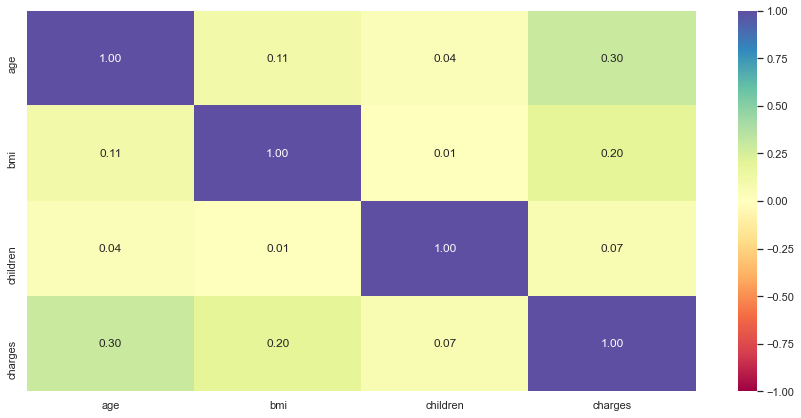

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [13]:
pd.get_dummies(data["region"], drop_first=True)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


<IPython.core.display.Javascript object>

In [14]:
X = data.drop(["charges"], axis=1)
y = data["charges"]

<IPython.core.display.Javascript object>

In [15]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)



<IPython.core.display.Javascript object>

In [16]:
# X.head()
# df_copy = data.drop(["sex", "smoker", "region"], axis=1)
# df_copy

<IPython.core.display.Javascript object>

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [18]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 936
Number of rows in test data = 402


<IPython.core.display.Javascript object>

In [19]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [20]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
age,251.681865
bmi,322.389107
children,344.964255
sex_male,-282.796347
smoker_yes,24059.390477
region_northwest,-304.090098
region_southeast,-939.342097
region_southwest,-868.188559
Intercept,-11039.238419


<IPython.core.display.Javascript object>

In [21]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [22]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6039.601871,4154.405109,0.754556,0.752438,42.246385


<IPython.core.display.Javascript object>

In [23]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6063.122657,4139.932065,0.740599,0.735319,41.156117


<IPython.core.display.Javascript object>

In [30]:
df3 = data["children"]
df3.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<IPython.core.display.Javascript object>